In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Bank_loan_data.xlsx")

In [3]:
df.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [4]:
df.shape

(5000, 16)

The dataset consist of 5000 rows and 16 columns

#Data Preprocessing

In [5]:
df = df.drop(labels=['ID'],axis=1)

The ID column is irrelevant and has no relationship with outcome. So, I removed it.

In [6]:
df.isna().sum()

Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

Gender, Income, Home Ownership and Online Column have missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Gender              3404 non-null   object 
 2   Experience          5000 non-null   int64  
 3   Income              4933 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Home Ownership      3811 non-null   object 
 10  Personal Loan       5000 non-null   object 
 11  Securities Account  5000 non-null   int64  
 12  CD Account          5000 non-null   int64  
 13  Online              4960 non-null   float64
 14  CreditCard          5000 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 586.1+

We have int, float and object datatypes

In [8]:
df["Gender"].unique()

array(['M', 'F', 'O', nan, '#', '-'], dtype=object)

In [9]:
df["Gender"].value_counts()

M    1677
F    1607
O      96
-      21
#       3
Name: Gender, dtype: int64

The values # and - might be data entry error or someone put them delibirately to fill later.

In [10]:
most_frequent = df["Gender"].mode()[0]
print(most_frequent)

M


In [11]:
df["Gender"] = df["Gender"].replace(['#', '-'], most_frequent)

I replaced the # and - with the most frequent value in the column since that is the most probable among all

The gender column and Home Ownership has way too many NULL values. I will use a simple Imputer to fill the missing values

In [12]:
df["Home Ownership"].value_counts()

Home Mortage    1705
Home Owner      1156
Rent             950
Name: Home Ownership, dtype: int64

In [13]:
df["Online"].value_counts()

1.0    2961
0.0    1999
Name: Online, dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

df[["Gender","Home Ownership", "Online"]] = categorical_imputer.fit_transform(df[["Gender","Home Ownership","Online"]])
df[["Income","Online"]] = numerical_imputer.fit_transform(df[["Income","Online"]])

I used most frequent method to fill the missing values in categorical features and median for the numerical features. I didnt use the mean since the data has some outliers which can directly affect the mean value.

In [15]:
df["Personal Loan"].value_counts()

0    4520
1     479
        1
Name: Personal Loan, dtype: int64

One of the value in Personal Loan column is empty.

In [16]:
df["Personal Loan"] = df["Personal Loan"].replace(' ', '1').astype(float)

I replaced the empty space with 1 since this dataset is imbalanced with 4520 entries out of 5000 belonging to class 0 already

In [17]:
df["Personal Loan"].value_counts()

0.0    4520
1.0     480
Name: Personal Loan, dtype: int64

In [18]:
df["Education"].value_counts()

1    2097
3    1500
2    1403
Name: Education, dtype: int64

#Exploratory Data Analysis

In [19]:
df.duplicated().sum()

0

There are no duplicated rows in the dataset

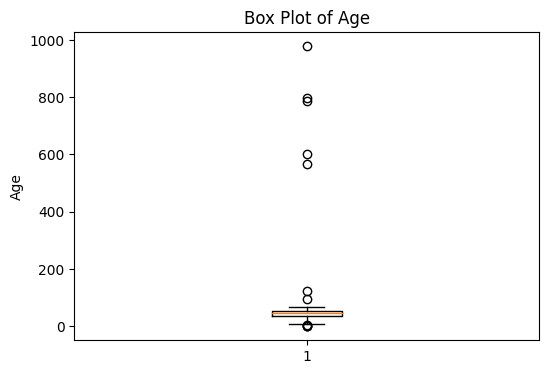

In [20]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Age'])
plt.ylabel('Age')
plt.title('Box Plot of Age')
plt.show()

In [21]:
df["Age"].value_counts()

35     150
43     149
52     145
58     142
54     142
50     137
30     136
41     136
56     135
39     133
34     133
57     132
59     132
51     128
46     127
60     127
45     127
42     126
40     125
31     124
55     124
62     123
29     123
61     121
32     120
33     120
44     120
48     118
38     115
49     115
53     112
47     111
63     108
36     107
37     105
28     102
27      91
65      80
64      78
26      78
25      53
24      28
66      24
23      12
67      12
0        2
4        1
8        1
7        1
600      1
786      1
13       1
2        1
978      1
97       1
567      1
122      1
797      1
Name: Age, dtype: int64

I will consider ages like 0 ,4 ,7, 600, 978 as outliers since such big ages are unrealistic and bank loan has no connection with childrens

In [22]:
valid_ages = df[(df['Age'] >= 20) & (df['Age'] <= 100)]['Age']
median_age = valid_ages.median()
outliers = df[(df['Age'] < 20) | (df['Age'] > 100)]
df.loc[outliers.index, 'Age'] = median_age

I calculated median of ages greater than 20 and less than 100 and replaced it in the place of outliers.

In [23]:
df["Age"].value_counts()

35    150
43    149
52    145
54    142
58    142
45    140
50    137
41    136
30    136
56    135
39    133
34    133
57    132
59    132
51    128
46    127
60    127
42    126
40    125
55    124
31    124
62    123
29    123
61    121
32    120
33    120
44    120
48    118
38    115
49    115
53    112
47    111
63    108
36    107
37    105
28    102
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
97      1
Name: Age, dtype: int64

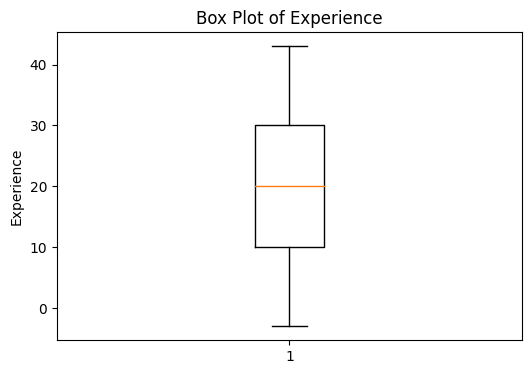

In [24]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Experience'])
plt.ylabel('Experience')
plt.title('Box Plot of Experience')
plt.show()

In [25]:
df["Experience"].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

There are some negative values in experience which I will count as outliers.

In [26]:
df['Experience'] = df['Experience'].abs()
df["Experience"].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
17    125
34    125
27    125
29    124
22    124
7     121
8     119
6     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

I removed the negative sign and left the original value as it is

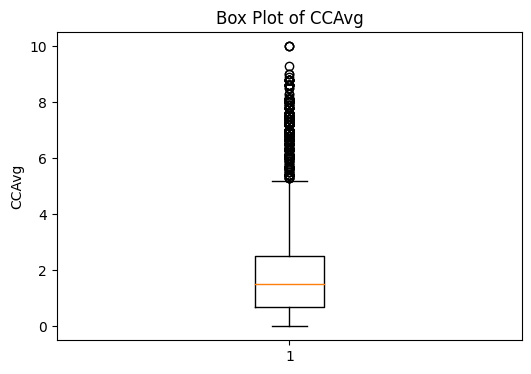

In [27]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['CCAvg'])
plt.ylabel('CCAvg')
plt.title('Box Plot of CCAvg')
plt.show()

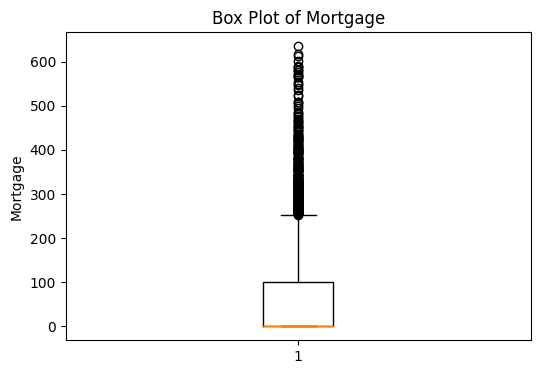

In [28]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Mortgage'])
plt.ylabel('Mortgage')
plt.title('Box Plot of Mortgage')
plt.show()

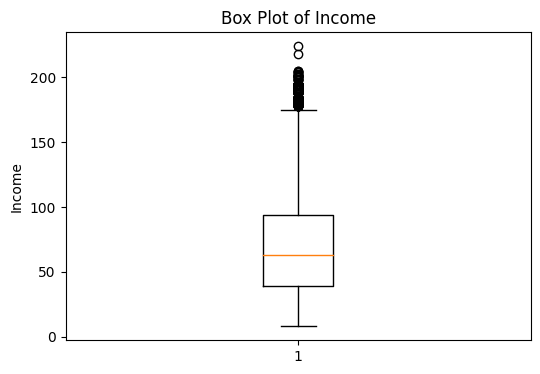

In [29]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Income'])
plt.ylabel('Income')
plt.title('Box Plot of Income')
plt.show()

The values outside the whiskers in CCAvg, Mortgage and Income are not necessarily outliers since it can be different for different people. So, I will leave it as it is

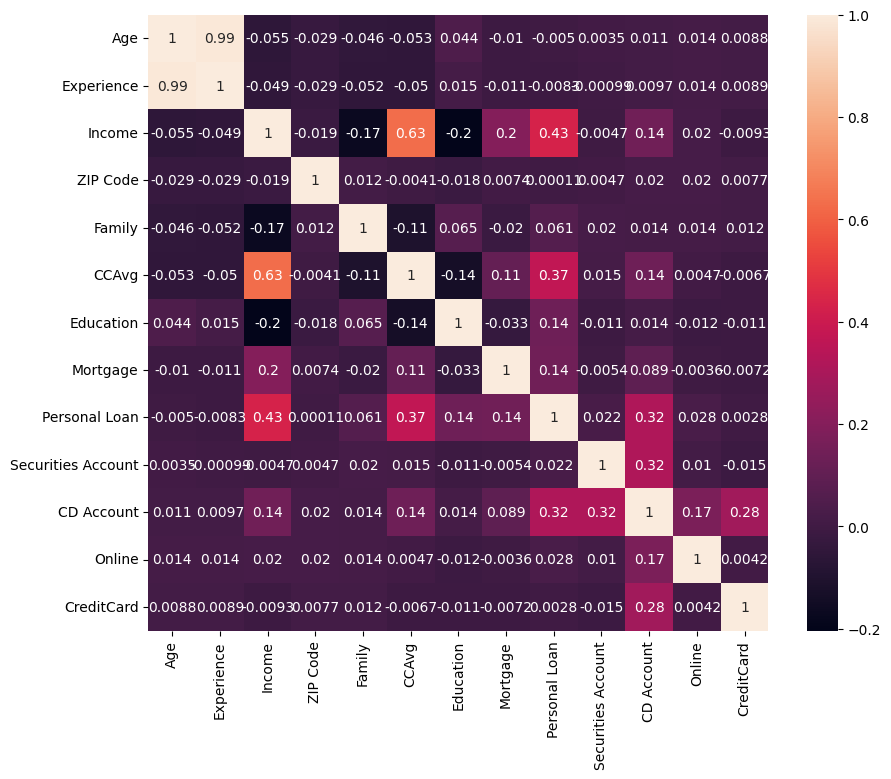

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

From the correlation matrix, it looks like people with high income, high CCAvg and people with CD Account in the bank are likely to accept loan.

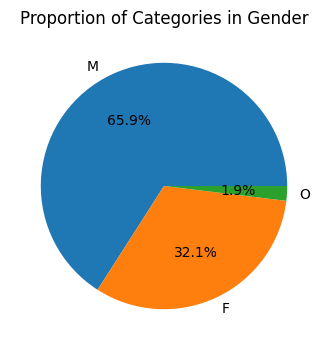

In [31]:
plt.figure(figsize=(6, 4))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%')
plt.title('Proportion of Categories in Gender')
plt.show()

Dataset is Male dominant and other genders than male and female are very rare

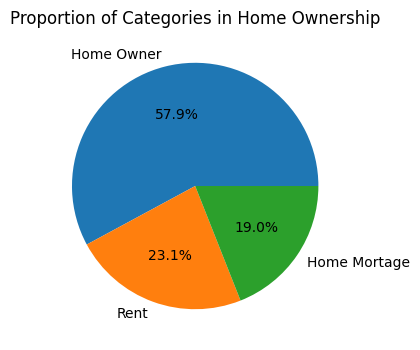

In [32]:
plt.figure(figsize=(6, 4))
plt.pie(df['Home Ownership'].value_counts(), labels=df['Home Ownership'].unique(), autopct='%1.1f%%')
plt.title('Proportion of Categories in Home Ownership')
plt.show()

Most people have their own home while others either rent or have mortgage

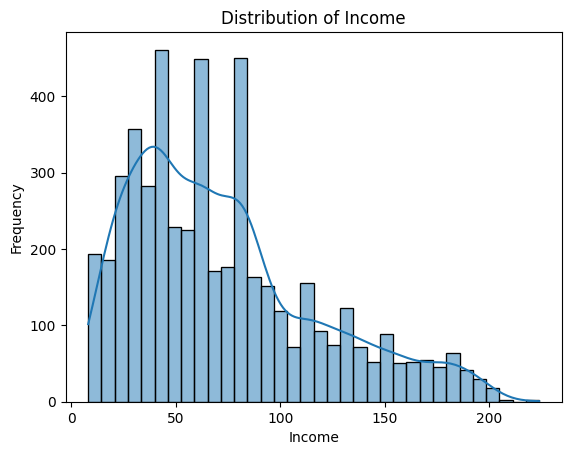

In [33]:
sns.histplot(df['Income'], kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

Most people have Income between 10 thousand and 80 thousand

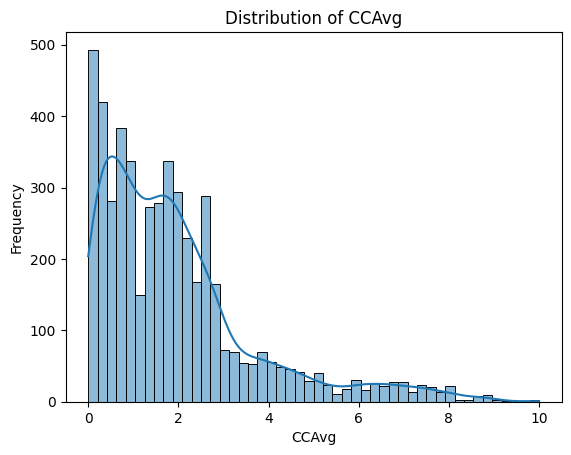

In [34]:
sns.histplot(df['CCAvg'], kde=True)
plt.xlabel('CCAvg')
plt.ylabel('Frequency')
plt.title('Distribution of CCAvg')
plt.show()

Most people spend betwwen 0 and 3 with their credit card

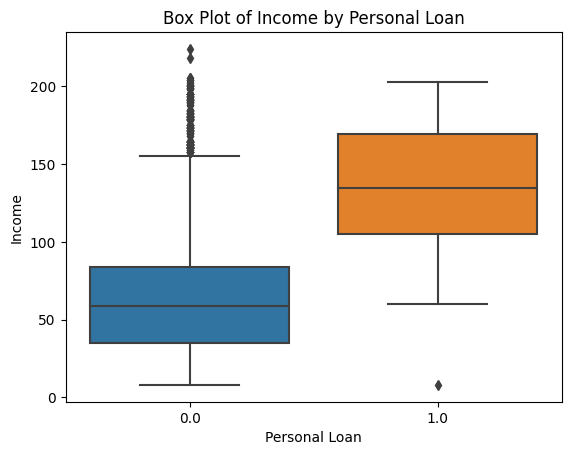

In [35]:
sns.boxplot(x='Personal Loan', y='Income', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Income')
plt.title('Box Plot of Income by Personal Loan')
plt.show()

People with income above 60 thousand are more likely to accept loans

# Feature Transformation

In [36]:
X = df.drop(columns=['Personal Loan'],axis=1)
Y = df['Personal Loan']

Seperated dependent and independent features

In [37]:
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot_encoder', OneHotEncoder())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, numerical_features),
        ('cat_pipeline', cat_pipeline, categorical_features)
    ]
)

Created a pipeline for data transformation

In [39]:
X = preprocessor.fit_transform(X)

#Data Split

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

I used stratified sampling while splitting data because of the imbalanced dataset

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 18)
(4000,)
(1000, 18)
(1000,)


#Training and Prediction

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    confusion = confusion_matrix(true, predicted)
    return accuracy, precision, recall, f1, confusion

Since the dataset is imbalanced, f1 score would be an ideal metric here

In [44]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
}

In [45]:
model_list = []
accuracy_train_list = []
accuracy_test_list = []
precision_train_list = []
precision_test_list = []
recall_train_list = []
recall_test_list = []
f1_train_list = []
f1_test_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    accuracy_train, precision_train, recall_train, f1_train, confusion_train = evaluate_model(y_train, y_train_pred)
    accuracy_test, precision_test, recall_test, f1_test, confusion_test = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print('\n')
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- Precision: {:.4f}".format(precision_train))
    print("- Recall: {:.4f}".format(recall_train))
    print("- F1-score: {:.4f}".format(f1_train))

    accuracy_train_list.append(accuracy_train)
    precision_train_list.append(precision_train)
    recall_train_list.append(recall_train)
    f1_train_list.append(f1_train)

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- Precision: {:.4f}".format(precision_test))
    print("- Recall: {:.4f}".format(recall_test))
    print("- F1-score: {:.4f}".format(f1_test))

    accuracy_test_list.append(accuracy_test)
    precision_test_list.append(precision_test)
    recall_test_list.append(recall_test)
    f1_test_list.append(f1_test)

    print('\n')

Logistic Regression


Model performance for Training set
- Accuracy: 0.9457
- Precision: 0.8249
- Recall: 0.5521
- F1-score: 0.6615
Model performance for Test set
- Accuracy: 0.9410
- Precision: 0.7681
- Recall: 0.5521
- F1-score: 0.6424


K-Neighbors Classifier


Model performance for Training set
- Accuracy: 0.9563
- Precision: 0.9604
- Recall: 0.5677
- F1-score: 0.7136
Model performance for Test set
- Accuracy: 0.9480
- Precision: 0.9231
- Recall: 0.5000
- F1-score: 0.6486


Decision Tree


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-score: 1.0000
Model performance for Test set
- Accuracy: 0.9800
- Precision: 0.8654
- Recall: 0.9375
- F1-score: 0.9000


Random Forest Classifier


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-score: 1.0000
Model performance for Test set
- Accuracy: 0.9870
- Precision: 0.9770
- Recall: 0.8854
- F1-score: 0.9290


AdaBoost Classifier


Model performanc

I will choose the AdaBoost algorithm here since it is performing best for this dataset considering the f1 score. Rest of them are either overfitting or underfitting

In [46]:
import pickle

AdaBoost_Classifier = AdaBoostClassifier()
AdaBoost_Classifier.fit(x_train, y_train)

filename = "AdaBoost.pickle"

pickle.dump(AdaBoost_Classifier, open(filename, "wb"))

loaded_model = pickle.load(open(filename, "rb"))
y_predicted = loaded_model.predict(x_train)

In [49]:
accuracy = accuracy_score(y_train, y_predicted)

precision = precision_score(y_train, y_predicted)

recall = recall_score(y_train, y_predicted)

f1 = f1_score(y_train, y_predicted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.96875
Precision: 0.8936170212765957
Recall: 0.765625
F1-score: 0.8246844319775596


Used pickle to save and load the model